<h1 align=center><font size = 10> k-Means </font></h1>

In this notebook, we try to practice one of the most popular algorithms in Clustering that we learned in this course: k-Means algorithm. 

We load a dataset using Pandas library and apply k-Means to explore information from data.
Lets first load required libraries:

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

def showandtell(title=None):
  plt.show()

A convenience function for you to use:

In [2]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [3]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()

    print("\n  Cluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

# Mandatory part (85%  of the total score)

### About dataset

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) 

*   List item
*   List item

(CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The questions you'll be exploring in this lab assignment using K-Means are: exactly how useful is telephone metadata? It must have some use, otherwise, the government wouldn't have invested however many millions they did into it secretly collecting it from phone carriers. Also what kind of intelligence can you extract from CDR metadata besides its face value?

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records of 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!


**1. Start by loading up the dataset and taking a peek at its head. You have to convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:**

In [4]:
#TO DO:
from datetime import datetime

print(datetime.now())

data = pd.read_csv("CDR.csv")
data.CallDate = pd.to_datetime(data.CallDate, errors='coerce')
data.CallTime = pd.to_timedelta(data.CallTime, errors='coerce')
print("Shape of data: ", data.shape)
print("Head of data: ", data.head())

2021-04-02 20:18:15.811857
Shape of data:  (53188, 10)
Head of data:             In         Out Direction   CallDate               CallTime  DOW  \
0  4638472273  2666307251  Incoming 2010-12-25 0 days 07:16:24.736813  Sat   
1  4638472273  1755442610  Incoming 2010-12-25 0 days 21:18:30.053710  Sat   
2  4638472273  5481755331  Incoming 2010-12-25 0 days 14:52:42.878016  Sat   
3  4638472273  1755442610  Incoming 2010-12-25 0 days 16:02:09.001913  Sat   
4  4638472273  2145623768  Incoming 2010-12-25 0 days 15:28:35.028554  Sat   

         Duration                               TowerID   TowerLat   TowerLon  
0  0:02:41.741499  0db53dd3-eb9c-4344-abc5-c2d74ebc3eec  32.731611 -96.709417  
1  0:02:47.108750  aeaf8b43-8034-44fe-833d-31854a75acbf  32.731722 -96.709500  
2  0:04:35.356341  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944 -96.910389  
3  0:02:23.498499  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944 -96.910389  
4  0:03:54.692497  95d7920d-c3cd-4d20-a568-9a55800dc807  32.8

In [5]:
print(data.dtypes)

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration              object
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object


**2. Create a distinct list of `In` phone numbers (people) and store the values in a regular python list.**

Make sure the numbers appear in your list in the same order they appear in your dataframe; but only keep a single copy of each number. [This link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html) might also be helpful.

In [6]:
#TO DO:
usersIn = data.In.tolist()
usersIn

[4638472273,
 4638472273,
 4638472273,
 4638472273,
 4638472273,
 4638472273,
 4638472273,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 1559410755,
 4931532174,
 4931532174,
 4931532174,
 4931532174,
 4931532174,
 2419930464,
 2419930464,
 1884182865,
 1884182865,
 1884182865,
 1884182865,
 3688089071,
 4555003213,
 4555003213,
 4555003213,
 4555003213,
 2068627935,
 2068627935,
 2068627935,
 2068627935,
 2894365987,
 2894365987,
 2894365987,
 2894365987,
 2894365987,
 2894365987,
 2894365987,
 2894365987,
 2894365987,
 8549533077,
 8549533077,
 8549533077,
 8549533077,
 8549533077,
 8549533077,
 8549533077,
 8549533077,
 4638472273,
 4638472273,
 4638472273,
 4638472273,
 4638472273,
 4638472273,

**3. Create a slice named `user1` that filters to _only_ include dataset records where the `In` feature (user's phone number) is equal to the first number on your unique list above, i.e., the very first number in the dataset:**

In [7]:
#TO DO:
user1 = data[data.In == usersIn[0]]
user1

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
...,...,...,...,...,...,...,...,...,...,...
53140,4638472273,2666307251,Missed,2013-02-26,0 days 11:26:01.888502,Tue,0:03:08.177065,0296279d-18c3-4709-853e-3e20496ce444,32.899944,-96.910389
53141,4638472273,2145623768,Missed,2013-02-26,0 days 17:32:18.776276,Tue,0:02:30.823459,78512965-e30b-4734-ae92-47b910fe3d7f,32.899944,-96.910389
53142,4638472273,4551601645,Incoming,2013-02-26,0 days 19:12:44.730636,Tue,0:03:42.954201,8fb02570-fb3f-4381-be74-3e1accf87ec5,32.750556,-96.694722
53143,4638472273,7721472178,Incoming,2013-02-26,0 days 07:50:41.435642,Tue,0:04:04.460385,e78826ad-45b0-45d4-90ec-4776d73f1d8e,32.864167,-96.836944


**4. Let's go ahead and plot all the call locations for user 1 in all time:**


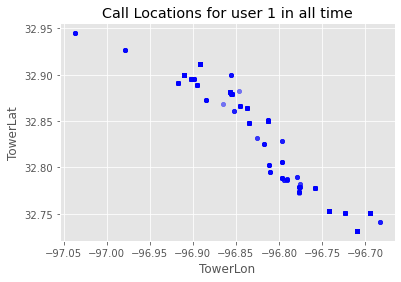

In [31]:
#TO DO:
user1.plot.scatter(x='TowerLon', y='TowerLat', c='b', alpha=0.5, title='Call Locations for user 1 in all time')
showandtell()  

INFO: The locations map above should be too "busy" to really wrap your head around. This is where domain expertise comes into play. Your intuition can direct you by knowing people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

**5. Add more filters to the `user1` slice you created. Add bitwise logic so that you only examine records that _came in_ on weekends (sat/sun):**

In [9]:
#TO DO:
user1_weekends = user1[(user1.DOW == "Sat") | (user1.DOW == "Sun")]
user1_weekends.shape

(1141, 10)

**6. Further filter `user1` down for calls that came in either before 6am OR after 10pm (22:00:00).**

Even if you didn't convert your times from string objects to time deltas, you can still use `<` and `>` to compare the string times as long as you code them as [military time strings](https://en.wikipedia.org/wiki/24-hour_clock), eg: "06:00:00", "22:00:00": 

You may also want to review the Data Manipulation section for this. Once you have your filtered slice, print out its length:

In [10]:
#TO DO:
user1_weekends = user1_weekends[(user1.CallTime < "06:00:00") | (user1.CallTime > "22:00:00")]
user1_weekends.shape

<ipython-input-10-8d3317de2480>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user1_weekends = user1_weekends[(user1.CallTime < "06:00:00") | (user1.CallTime > "22:00:00")]


(28, 10)

**7. Visualize the dataframe with a scatter plot as a sanity check.**

Since you're [familiar with maps](https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude), you know well that your X-Coordinate should be Longitude, and your Y coordinate should be the tower Latitude. Check the dataset headers for proper column feature names.
 
At this point, you don't yet know exactly where the user is located just based on the cell phone tower position data; but considering the below are for Calls that arrived in the twilight hours of weekends, it's likely that wherever they are bunched up is probably near where the caller's residence:

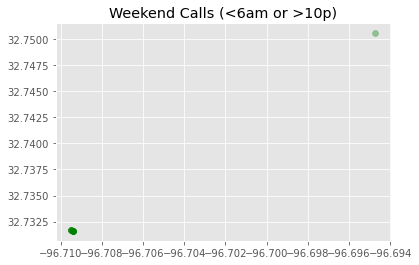

In [11]:
#TO DO:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1_weekends.TowerLon,user1_weekends.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
showandtell() 

**8. Run K-Means on that dataframe with `K=2` then print out the Cluster Info using clusterInfo function**, with the goal being that one of the centroids will sweep up the annoying outliers; and the other will zero in on the user's approximate home location. Or rather the location of the cell tower closest to their home.....

Be sure to only feed in Lat and Lon coordinates to the KMeans algorithm since none of the other data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required.

In [12]:
#TO DO:
sliceK = user1_weekends[['TowerLon', 'TowerLat']]
# Number of time the k-means algorithm will be run with different centroid seeds.
# The final results will be the best output of n_init consecutive runs in terms of inertia.
# ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.
model = KMeans(n_clusters=2, n_init=10, init='random')
model.fit(sliceK)

KMeans(init='random', n_clusters=2)

In [13]:
clusterInfo(model)

Cluster Analysis Inertia:  1.1304346153788861e-07
------------------------------------------

  Cluster  0
    Centroid  [-96.70944573  32.73164942]
    #Samples  26

  Cluster  1
    Centroid  [-96.694722  32.750556]
    #Samples  2


**9. Add centroid locations onto your scatter plot. Use a distinguishable marker and color.**

Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.

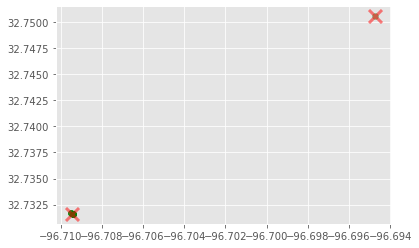

[[-96.70944573  32.73164942]
 [-96.694722    32.750556  ]]


In [14]:
#TO DO:
centroids = model.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1_weekends.TowerLon,user1_weekends.TowerLat, c='g', marker='o', alpha=0.2)
ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5,
             linewidths=3, s=169)

showandtell()  

print (centroids)
 

**10. Now that you have a system in place, repeat the above steps (4, 8, and 9) for all 10 individuals in the dataset**. 

You might want to use a for-loop unless you enjoy copying and pasting:

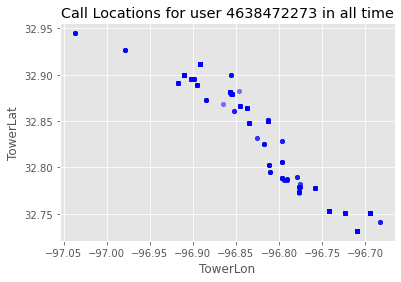

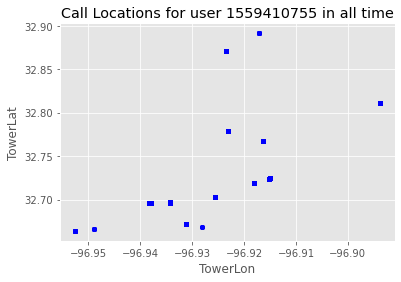

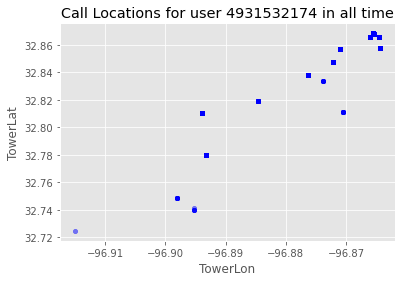

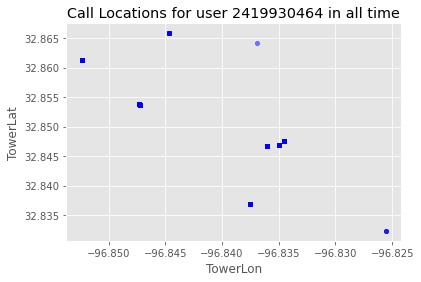

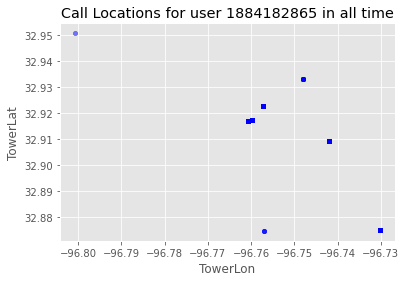

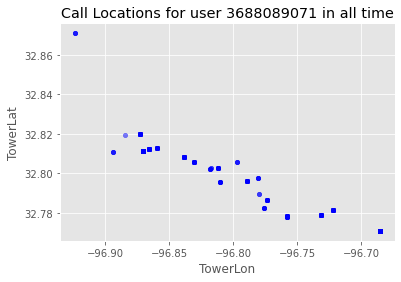

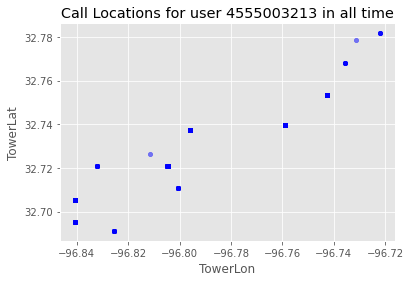

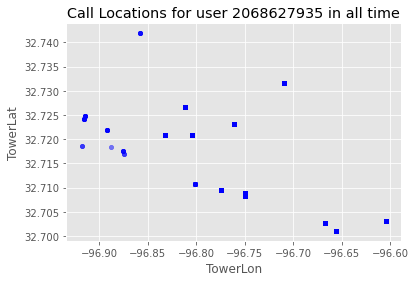

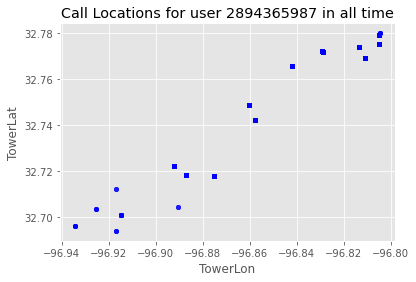

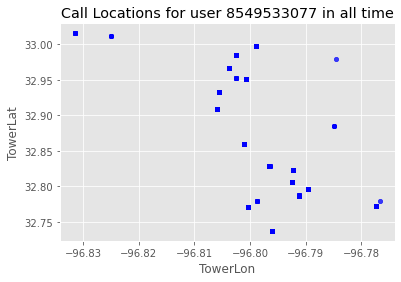

In [15]:
#TO DO:
# Step 4: the call locations for individuals in all time

models = []

for row in data.In:
    if row not in models:
        models.append(row)
        
for user in models:
    user_inv = data[data.In == user]
    user_inv.plot.scatter(x='TowerLon', y='TowerLat', c='blue', alpha=0.5, 
                          title='Call Locations for user {}'.format(user) + ' in all time')
    showandtell()

In [16]:
# Step 8: cluster info of individuals
models = []

for row in data.In:
    if row not in models:
        models.append(row)
        
for user in models:
    user_inv = data[data.In == user]
    sliceK = user_inv[['TowerLon', 'TowerLat']]
    model = KMeans(n_clusters=2, n_init=10, init='random')
    model.fit(sliceK)
    print('\nCluster info of user {}'.format(user))
    clusterInfo(model)


Cluster info of user 4638472273
Cluster Analysis Inertia:  2.022262734212573
------------------------------------------

  Cluster  0
    Centroid  [-96.90470092  32.89725753]
    #Samples  2021

  Cluster  1
    Centroid  [-96.71403501  32.73670309]
    #Samples  1627

Cluster info of user 1559410755
Cluster Analysis Inertia:  2.5360882555983264
------------------------------------------

  Cluster  0
    Centroid  [-96.92288527  32.8697266 ]
    #Samples  4969

  Cluster  1
    Centroid  [-96.93403247  32.69997899]
    #Samples  6664

Cluster info of user 4931532174
Cluster Analysis Inertia:  0.19885973913384422
------------------------------------------

  Cluster  0
    Centroid  [-96.86643342  32.86357133]
    #Samples  1286

  Cluster  1
    Centroid  [-96.89310902  32.78195472]
    #Samples  1610

Cluster info of user 2419930464
Cluster Analysis Inertia:  0.011290729481904311
------------------------------------------

  Cluster  0
    Centroid  [-96.83518329  32.84671395]
    

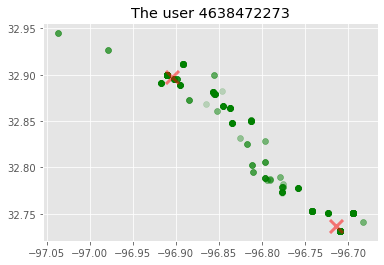

[[-96.71403501  32.73670309]
 [-96.90470092  32.89725753]]


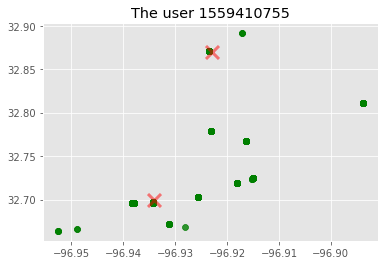

[[-96.93403247  32.69997899]
 [-96.92288527  32.8697266 ]]


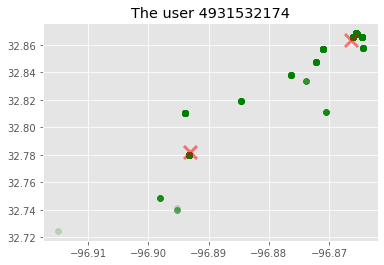

[[-96.86643342  32.86357133]
 [-96.89310902  32.78195472]]


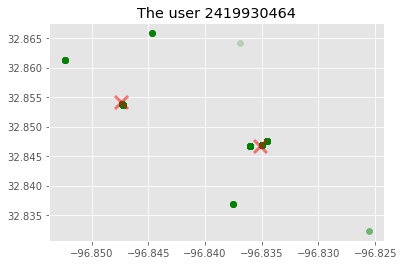

[[-96.83518329  32.84671395]
 [-96.84741331  32.8541588 ]]


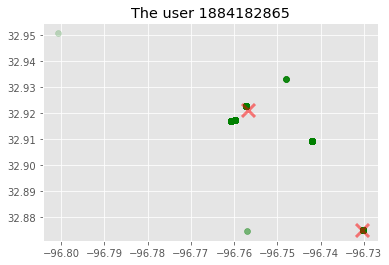

[[-96.73034439  32.87499931]
 [-96.75668579  32.92125161]]


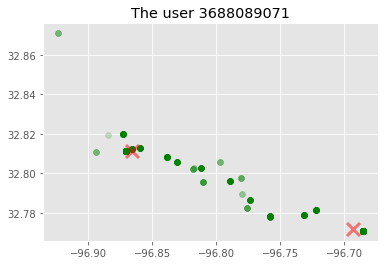

[[-96.8656604   32.81106828]
 [-96.69267292  32.77201023]]


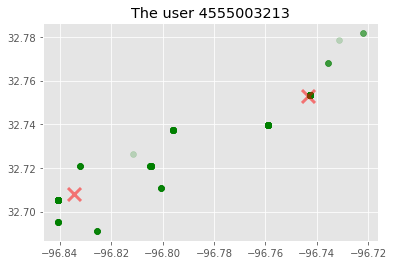

[[-96.74349526  32.75278632]
 [-96.83462391  32.70801142]]


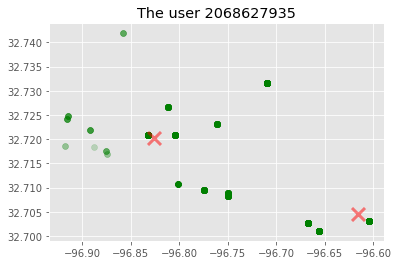

[[-96.82606713  32.72028091]
 [-96.61532634  32.7045021 ]]


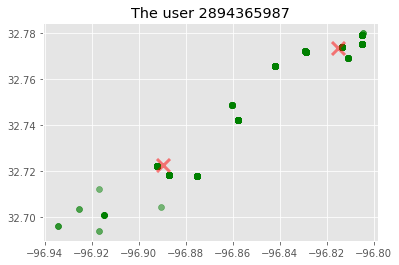

[[-96.88984119  32.72271798]
 [-96.81508844  32.77336354]]


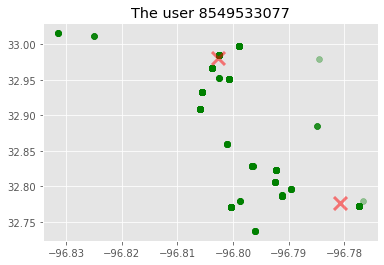

[[-96.78080907  32.77726672]
 [-96.80278795  32.98115835]]


In [17]:
models = []

for row in data.In:
    if row not in models:
        models.append(row)
        
for user in models:
    user_inv = data[data.In == user]
    sliceK = user_inv[['TowerLon', 'TowerLat']]
    model = KMeans(n_clusters=2, n_init=10, init='random')
    model.fit(sliceK)
    centroids = model.cluster_centers_
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user_inv.TowerLon,user_inv.TowerLat, c='g', marker='o', alpha=0.2)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5,
               linewidths=3, s=169)
    plt.title('The user {}'.format(user))
    showandtell()  

    print (centroids)

**11. Alter your slice from user1, so that it includes only Weekday (Mon-Fri) values and before 5pm:**

The idea is that the call was placed before 5pm. From Midnight-730a, the user is probably sleeping and won't call/wake up to take a call. There should be a brief time in the morning during their commute to work, then they'll spend the entire day at work. So the assumption is that most of the time is spent either at work or at the second, at home:
        

In [18]:
user1_weekday = user1[(user1.DOW != "Sat") & (user1.DOW != "Sun")]

In [19]:
user1_weekday = user1_weekday[(user1.CallTime < "17:00:00")]
user1_weekday.shape

<ipython-input-19-059b9df880f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user1_weekday = user1_weekday[(user1.CallTime < "17:00:00")]


(1405, 10)

**12. Plot the Cell Towers the above data frame:**


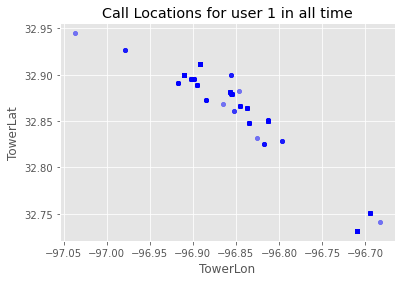

In [20]:
#TO DO:
user1_weekday.plot.scatter(x='TowerLon', y='TowerLat', c='blue', alpha=0.5, 
                           title='Call Locations for user 1 in all time')
showandtell() 

**13. Complete the doKmeans function:**

In [21]:
#TO DO:
def doKMeans(data, num_clusters=0):
    # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
    # data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
    # no feature scaling is required. Print out the centroid locations and add them onto your scatter
    # plot. Use a distinguishable marker and color.
    #
    # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first). This is part
    # of your domain expertise. Also, *YOU* need to create, initialize (and return) the variable named
    # `model` here, which will be a SKLearn K-Means model for this to work:
    
    sliceK = data[['TowerLat', 'TowerLon']]
    model = KMeans(n_clusters= num_clusters, n_init=12, init='random')
    model.fit(sliceK)
    
    return model

**14. Let's tun K-Means with `K=3`using doKMeans function for that dataframe (user1 on weekdays in daytime). Then print out the cluster info using clusterInfo function:**

There should only be two areas of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another).

In [22]:
model = doKMeans(user1_weekday, 3)
clusterInfo(model)

Cluster Analysis Inertia:  0.15891069523780166
------------------------------------------

  Cluster  0
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140

  Cluster  1
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  2
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306


**15. Print out the mean `CallTime` value for the samples belonging to the cluster with the LEAST samples attached to it.** 

If our logic is correct, the cluster with the MOST samples will be work. The cluster with the 2nd most samples will be home. And the `K=3` cluster with the least samples should be somewhere in between the two. What time, on average, is the user in between home and work, between midnight and 5pm?

In [23]:
user1_weekday.head(2)

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
197,4638472273,5481755331,Incoming,2010-12-28,0 days 16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
200,4638472273,8180005891,Incoming,2010-12-28,0 days 15:27:51.105337,Tue,0:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389


In [24]:
#TO DO:
model = doKMeans(user1_weekday, 3)
print('Its Waypoint Time: ', user1_weekday['CallTime'].mean())
clusterWithFewestSamples(model)

Its Waypoint Time:  0 days 09:33:55.437664334

  Cluster With Fewest Samples:  1


array([False, False, False, ..., False,  True,  True])

**16. Let's visualize the results by drawing the X's for the cluster centers combined with location plot:**


Text(0.5, 1.0, 'Weekday Calls Centroids for user 1')

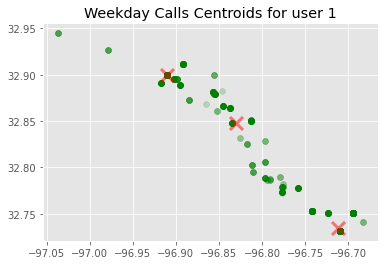

In [25]:
sliceK = user1[['TowerLon', 'TowerLat']]
model.fit(sliceK)
centroids = model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2, cmap='viridis')
ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5,
           linewidths=3, s=169)
plt.title('Weekday Calls Centroids for user 1')

# Adanved part (15%  of the total score)

**17. Now that you have a system in place, repeat the the steps 12, 14 and 16 for all 10 individuals in the dataset.**

In [26]:
#TO DO:
user_inv_weekday = user_inv[(user_inv.DOW != "Sat") & (user_inv.DOW != "Sun")]

In [27]:
user_inv = user_inv[(user_inv.CallTime < "17:00:00")]
user_inv

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
64,8549533077,1351945852,Incoming,2010-12-25,0 days 13:28:27.124408,Sat,0:03:36.468217,307aa2a7-af7e-41c5-be4b-e8ad4a8fac3f,32.985083,-96.802528
65,8549533077,7780268236,Incoming,2010-12-25,0 days 11:01:32.321428,Sat,0:04:23.300953,6a3b5a57-2911-424e-9e53-3a7a47edd10c,32.985083,-96.802528
66,8549533077,735739554,Missed,2010-12-25,0 days 11:50:53.646754,Sat,0:04:01.551380,06fe2702-1f88-4dfd-90d6-22c2d3227855,32.985083,-96.802556
70,8549533077,4851119073,Incoming,2010-12-25,0 days 12:16:14.361803,Sat,0:02:44.481410,269b1e26-49c4-4308-8879-8f2d37528c8a,32.985083,-96.802528
155,8549533077,1738044056,Incoming,2010-12-26,0 days 15:13:52.851244,Sun,0:03:05.423833,269b1e26-49c4-4308-8879-8f2d37528c8a,32.985083,-96.802528
...,...,...,...,...,...,...,...,...,...,...
53134,8549533077,9105971486,Missed,2013-02-25,0 days 16:57:52.158851,Mon,0:04:53.007036,0de53f0d-2eed-4fad-a5cd-3cbc35b635d5,32.985083,-96.802556
53137,8549533077,8624290542,Missed,2013-02-25,0 days 13:08:46.490273,Mon,0:05:07.599325,269b1e26-49c4-4308-8879-8f2d37528c8a,32.985083,-96.802528
53185,8549533077,186272563,Incoming,2013-02-26,0 days 16:08:57.602134,Tue,0:01:57.577549,06fe2702-1f88-4dfd-90d6-22c2d3227855,32.985083,-96.802556
53186,8549533077,2288700880,Incoming,2013-02-26,0 days 08:01:39.721347,Tue,0:01:39.690498,269b1e26-49c4-4308-8879-8f2d37528c8a,32.985083,-96.802528


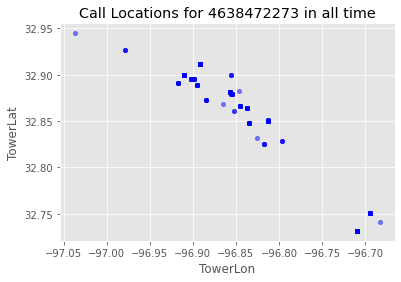

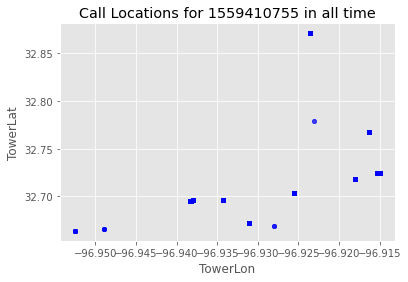

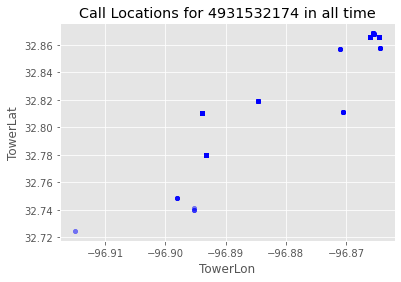

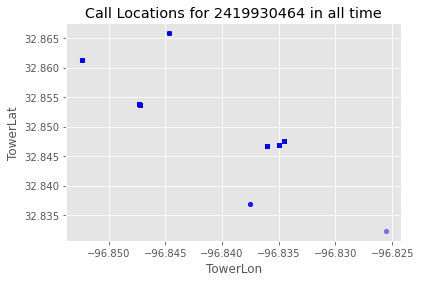

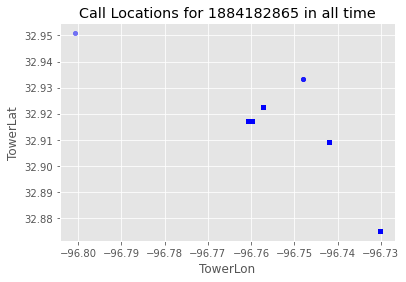

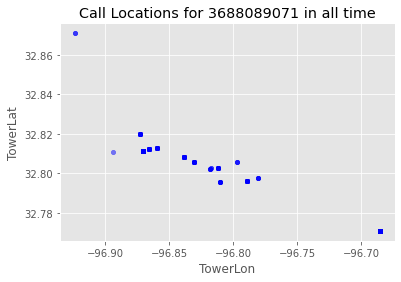

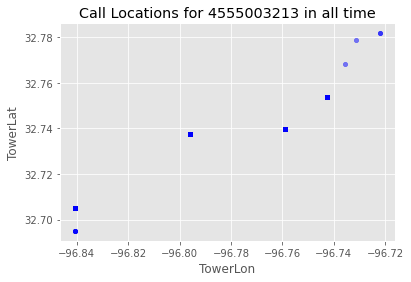

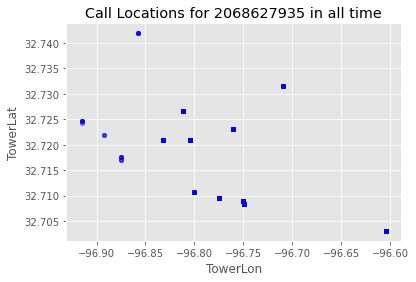

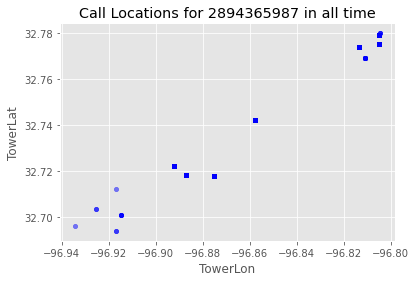

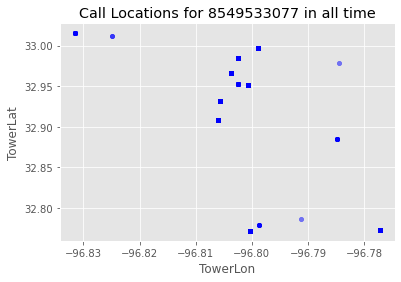

In [28]:
models = []

for row in data.In:
    if row not in models:
        models.append(row)
        
for user in models:
    user_inv = data[data.In == user]
    sliceK = user_inv[['TowerLon', 'TowerLat']]
    user_inv_weekday = user_inv[(user_inv.DOW != "Sat") & (user_inv.DOW != "Sun")]
    user_inv_weekday = user_inv_weekday[(user_inv_weekday.CallTime < "17:00:00")]
    user_inv_weekday.plot.scatter(x='TowerLon', y='TowerLat', c='blue', alpha=0.5, 
                       title='Call Locations for {}'.format(user) + ' in all time')
    showandtell() 

In [29]:
#TO DO:
models = []

for row in data.In:
    if row not in models:
        models.append(row)
        
for user in models:
    user_inv = data[data.In == user]
    sliceK = user_inv[['TowerLon', 'TowerLat']]
    user_inv_weekday = user_inv[(user_inv.DOW != "Sat") & (user_inv.DOW != "Sun")]
    user_inv_weekday = user_inv_weekday[(user_inv_weekday.CallTime < "17:00:00")]
    model = doKMeans(user_inv_weekday, 3)
    print('\nCluster info of user {}'.format(user))
    clusterInfo(model)


Cluster info of user 4638472273
Cluster Analysis Inertia:  0.15891069523780166
------------------------------------------

  Cluster  0
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

Cluster info of user 1559410755
Cluster Analysis Inertia:  0.2657446177582843
------------------------------------------

  Cluster  0
    Centroid  [ 32.69557708 -96.93522725]
    #Samples  3121

  Cluster  1
    Centroid  [ 32.87096795 -96.92355104]
    #Samples  921

  Cluster  2
    Centroid  [ 32.73762409 -96.9164561 ]
    #Samples  360

Cluster info of user 4931532174
Cluster Analysis Inertia:  0.01955096987811486
------------------------------------------

  Cluster  0
    Centroid  [ 32.77992299 -96.89338791]
    #Samples  846

  Cluster  1
    Centroid  [ 32.86562866 -96.86563953]
    #Samples  197

  Cluster  2
    Centroid  [ 32.813094

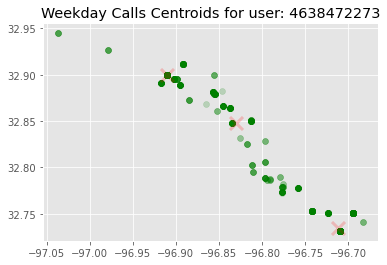

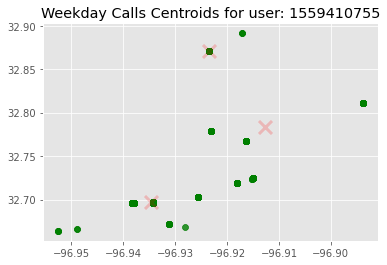

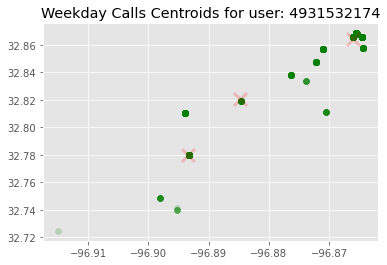

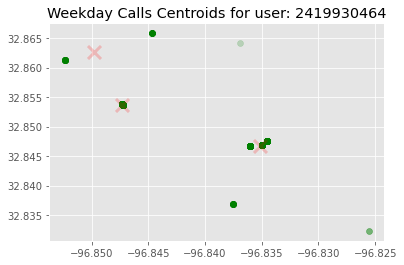

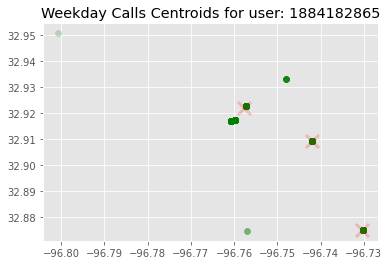

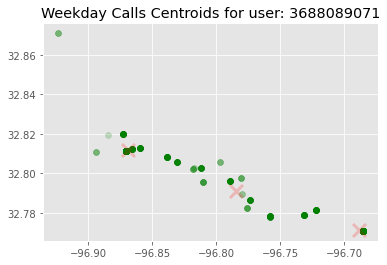

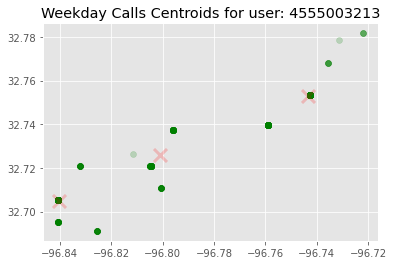

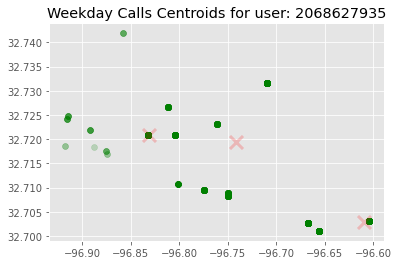

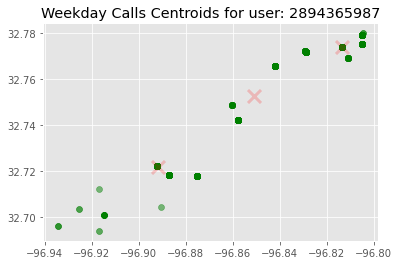

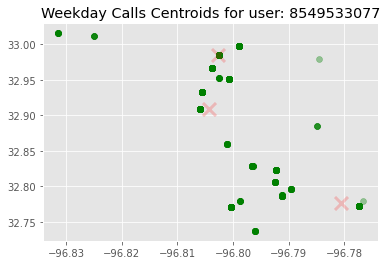

In [30]:
models = []

for row in data.In:
    if row not in models:
        models.append(row)
        
for user in models:
    user_inv = data[data.In == user]
    sliceK = user_inv[['TowerLon', 'TowerLat']]
     
    model = KMeans(n_clusters=3, n_init=10)
    model.fit(sliceK)
    centroids = model.cluster_centers_
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Weekday Calls Centroids for user: {}'.format(user))
    ax.scatter(user_inv.TowerLon,user_inv.TowerLat, c='g', marker='o', alpha=0.2)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.2,
               linewidths=3, s=169)